# Semantic Segmentation
Created Date: Nov 3, 2023  
Dataset: https://www.kaggle.com/datasets/sadhliroomyprime/motorcycle-night-ride-semantic-segmentation  
- Six classes  
- 
Goal of the Quest:  
- Build my own the image segmentaion model (U-Net)  
  
# 1. Data preprocessing

In [1]:
! tree images/

images/
├── night ride (100).png
├── night ride (100).png___fuse.png
├── night ride (100).png___save.png
├── night ride (10).png
├── night ride (10).png___fuse.png
├── night ride (10).png___save.png
├── night ride (11).png
├── night ride (11).png___fuse.png
├── night ride (11).png___save.png
├── night ride (12).png
├── night ride (12).png___fuse.png
├── night ride (12).png___save.png
├── night ride (13).png
├── night ride (13).png___fuse.png
├── night ride (13).png___save.png
├── night ride (14).png
├── night ride (14).png___fuse.png
├── night ride (14).png___save.png
├── night ride (15).png
├── night ride (15).png___fuse.png
├── night ride (15).png___save.png
├── night ride (16).png
├── night ride (16).png___fuse.png
├── night ride (16).png___save.png
├── night ride (17).png
├── night ride (17).png___fuse.png
├── night ride (17).png___save.png
├── night ride (18).png
├── night ride (18).png___fuse.png
├── night ride (18).png___save.png
├── night ride (19).png
├── night ride (19).png__

## 1.1 Load & Check Data

In [2]:
import os

input_dir = "images/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
    for fname in os.listdir(input_dir)
    if not ("fuse" in fname or "save" in fname)]
)

target_img_paths = sorted(
    [os.path.join(input_dir, fname)
    for fname in os.listdir(input_dir)
    if ("fuse" in fname)]
) 

In [48]:
print("Number of input images:", len(input_img_paths))
print("Number of target images:", len(target_img_paths))


Number of input images: 200
Number of target images: 200


In [49]:
if set(input_img_paths) == set(target_img_paths):
    print("The lists are the same.")
else: 
    print("The lists are different.")


The lists are different.


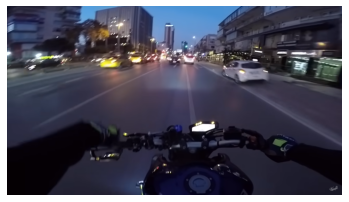

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

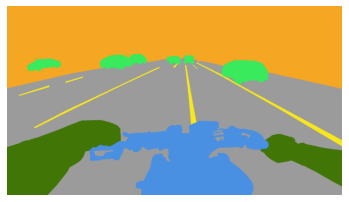

In [4]:
plt.axis("off")
plt.imshow(load_img(target_img_paths[9]))

- Check the numbers and size of images

In [5]:
load_img(target_img_paths[9]).size

(1920, 1080)

In [6]:
print("Number of files:", len(input_img_paths))

Number of files: 200


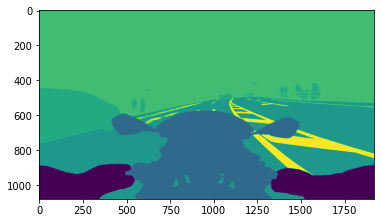

In [37]:
def display_target(target_array):
    array = (target_array.astype("uint8") - 1)
    plt.imshow(array[:, :, 0])
    
img = img_to_array(load_img(target_img_paths[0], color_mode="grayscale"))
display_target(img)

## 1.2 Devide to Train, Test, Val dataset
Number of dataset.  
- Train: 130  
- Val: 35  
- Test: 35

In [61]:
import numpy as np 
import random

img_size = (128, 128)
num_imgs = len(input_img_paths)

random.Random(100).shuffle(input_img_paths)
random.Random(100).shuffle(target_img_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target_image(path):
    img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

In [62]:
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32") 
targets =    np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i]) 
    targets[i] = path_to_target_image(target_img_paths[i])

In [63]:
num_train_samples = 130
num_val_samples = 35

train_input_imgs = input_imgs[:num_train_samples]
train_targets =       targets[:num_train_samples]

val_input_imgs = input_imgs[num_train_samples : num_train_samples+num_val_samples]
val_targets =       targets[num_train_samples : num_train_samples+num_val_samples]

test_input_imgs = input_imgs[num_train_samples+num_val_samples:]
test_targets =       targets[num_train_samples+num_val_samples:]

In [64]:
print(train_input_imgs.shape)
print(train_targets.shape)
print(val_input_imgs.shape)
print(val_targets.shape)
print(test_input_imgs.shape)
print(test_targets.shape)

(130, 128, 128, 3)
(130, 128, 128, 1)
(35, 128, 128, 3)
(35, 128, 128, 1)
(35, 128, 128, 3)
(35, 128, 128, 1)


In [65]:
import numpy as np

unique_values_1 = np.unique(train_targets)
print("Unique values in train_targets:", unique_values_1)

unique_values_2 = np.unique(val_targets)
print("Unique values in val_targets:", unique_values_2)

unique_values_3 = np.unique(test_targets)
print("Unique values in test_targets:", unique_values_3)

Unique values in train_targets: [ 88 131 154 164 174 212 255]
Unique values in val_targets: [ 88 131 154 164 174 212 255]
Unique values in test_targets: [ 88 131 154 164 174 212]


In [69]:
import os

# Find the indices of data points with label 255 in the train set
train_indices_with_label_255 = np.where(train_targets == 255)[0]

# Get the file names corresponding to data points with label 255 in the train set
train_file_names_with_label_255 = [os.path.basename(input_img_paths[i]) for i in train_indices_with_label_255]

# Now you have lists of file names corresponding to data points with label 255
print("File names with label 255 in the train set:", train_file_names_with_label_255)


# Find the indices of data points with label 255 in the train set
val_indices_with_label_255 = np.where(val_targets == 255)[0]

# Get the file names corresponding to data points with label 255 in the train set
val_file_names_with_label_255 = [os.path.basename(input_img_paths[i]) for i in val_indices_with_label_255]

# Now you have lists of file names corresponding to data points with label 255
print("File names with label 255 in the val set:", val_file_names_with_label_255)

File names with label 255 in the train set: ['Screenshot (438).png', 'Screenshot (438).png', 'Screenshot (438).png', 'Screenshot (438).png', 'Screenshot (438).png', 'Screenshot (438).png', 'Screenshot (438).png']
File names with label 255 in the val set: ['Screenshot (450).png']


In [70]:
print(train_indices_with_label_255)
print(val_indices_with_label_255)

[113 113 113 113 113 113 113]
[23]


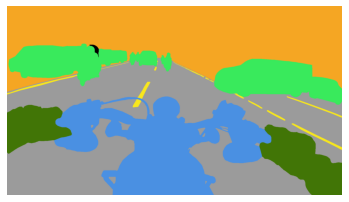

In [68]:
plt.axis("off")
plt.imshow(load_img(target_img_paths[113]))

In [57]:
indices_to_remove = [49, 90]

train_input_imgs = [img for i, img in enumerate(train_input_imgs) if i not in indices_to_remove]
train_targets = [target for i, target in enumerate(train_targets) if i not in indices_to_remove]

In [60]:

print(val_input_imgs.shape)
print(val_targets.shape)
print(test_input_imgs.shape)
print(test_targets.shape)

(35, 128, 128, 3)
(35, 128, 128, 1)
(35, 128, 128, 3)
(35, 128, 128, 1)


# 2. Model
## 2.1 Build Model

In [38]:
def EncoderBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    
    x = layers.Conv2D(n_filters, 3,
                      padding="same", kernel_initializer='HeNormal')(inputs)
    x = layers.Conv2D(n_filters, 3,
                      padding="same", kernel_initializer='HeNormal')(x)
    x = layers.BatchNormalization()(x, training=False)
    x = layers.Activation("relu")(x)
    
    if dropout_prob > 0:     
        x = layers.Dropout(dropout_prob)(x)
        
    if max_pooling:
        next_layer = layers.MaxPooling2D(pool_size = (2,2))(x)
    else:
        next_layer = x
    
    skip_connection = x
    
    return next_layer, skip_connection

In [39]:
def DecoderBlock(inputs, skip_connection, n_filters=32):
    #Transpose
    x = layers.Conv2DTranspose(n_filters, (3,3), strides=(2,2), padding='same')(inputs)
    
    # Merge
    x = layers.Concatenate()([x, skip_connection])
    
    x = layers.Conv2D(n_filters, 3, activation="relu",
                      padding="same", kernel_initializer='HeNormal')(x)
    x = layers.Conv2D(n_filters, 3, activation="relu",
                      padding="same", kernel_initializer='HeNormal')(x)
    
    return x

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [41]:
def get_UNet_model(img_size, num_classes):
    inputs = keras.Input(img_size)
    
    # Data Augmentation
    # x = data_augmentation(inputs)
    
    # Rescaling
    x = layers.Rescaling(1./255)(inputs)

    # Encoder
    encode_block_1 = EncoderBlock(x, 64, dropout_prob=0, max_pooling=True)
    encode_block_2 = EncoderBlock(encode_block_1[0], 128, max_pooling=True)
    encode_block_3 = EncoderBlock(encode_block_2[0], 256, max_pooling=True)
    
    # Middle Block
    encode_block_4 = EncoderBlock(encode_block_3[0], 512, max_pooling=False)
    
    # Decoder
    decode_block_1 = DecoderBlock(encode_block_4[0], encode_block_3[1], 256)
    decode_block_2 = DecoderBlock(decode_block_1, encode_block_2[1], 128)
    decode_block_3 = DecoderBlock(decode_block_2, encode_block_1[1], 64)
    
    # Classifier
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(decode_block_3)
    model = keras.Model(inputs, outputs)
    
    return model

model = get_UNet_model(img_size=(128, 128, 3), num_classes=6)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        rescaling[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
______________________________________________________________________________________________

In [42]:
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath="Unet_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss"
)

callbacks = [early_stopping, model_checkpoint]

history = model.fit(
    train_input_imgs, train_targets,
    epochs=3,
    callbacks=callbacks,
    batch_size=8,
    validation_data=(val_input_imgs, val_targets)
)


Epoch 1/3


ValueError: in user code:

    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.9/site-packages/keras/engine/input_spec.py:199 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model expects 1 input(s), but it received 128 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(8, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(8, 128, 3) dtype=float32>]


In [66]:
print(history.history)

{'loss': [nan, nan, nan], 'accuracy': [0.0, 0.0, 0.0], 'val_loss': [nan, nan, nan], 'val_accuracy': [0.0, 0.0, 0.0]}
